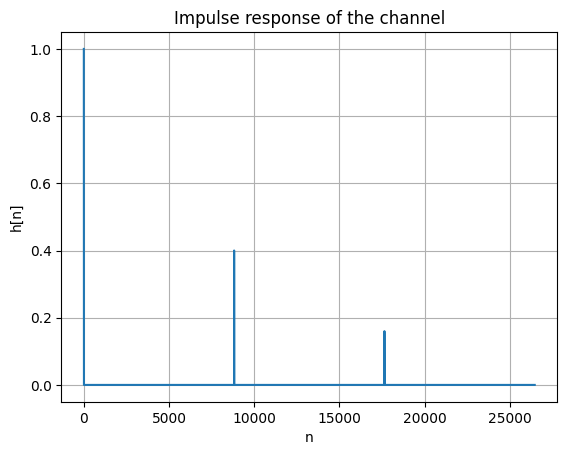

Index: 0, Amplitude: 1.0
Index: 8820, Amplitude: 0.4
Index: 17640, Amplitude: 0.16


In [1]:
from hcanald import hcanald
import matplotlib.pyplot as plt
import numpy as np

[n, h] = hcanald(32869)

plt.plot(n, h)
plt.xlabel('n')
plt.ylabel('h[n]')
plt.title('Impulse response of the channel')
plt.grid()
plt.show()

non_zero_indices = np.nonzero(h)[0]
non_zero_amplitudes = h[non_zero_indices]

for idx, amp in zip(non_zero_indices, non_zero_amplitudes):
    print(f"Index: {idx}, Amplitude: {amp}")

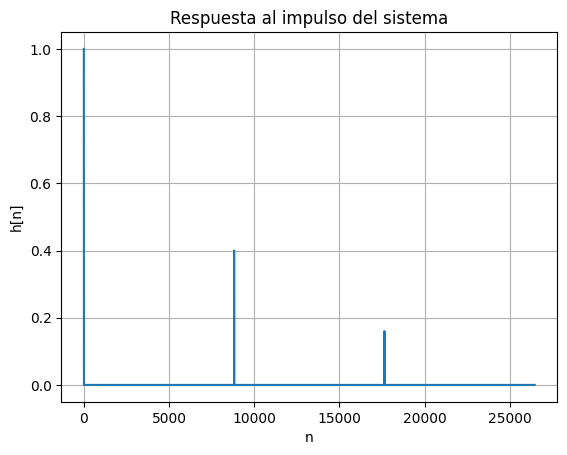

Index: 0, Amplitude: 1.0
Index: 8820, Amplitude: 0.4
Index: 17640, Amplitude: 0.16


In [2]:
# Implementacion del sistema
from sistemas import sistema, filtro1, filtro2


N = len(n)
delta = np.zeros(N) # Impulso unitario
delta[0] = 1

# Verificacion de la respuesta al impulso
h_propia = sistema(delta)

plt.plot(n, h_propia)
plt.xlabel('n')
plt.ylabel('h[n]')
plt.title('Respuesta al impulso del sistema')

plt.grid()
plt.show()

non_zero_indices = np.nonzero(h_propia)[0]
non_zero_amplitudes = h_propia[non_zero_indices]

for idx, amp in zip(non_zero_indices, non_zero_amplitudes):
    print(f"Index: {idx}, Amplitude: {amp}")

In [3]:
import librosa
import matplotlib.pyplot as plt
import sounddevice as sd


# Leer archivo de audio
audio, fs = librosa.load('audio.wav', sr=None)

print("Frecuencia de muestreo: ", fs)

# Play the audio
sd.play(audio, samplerate=fs)

# Wait until the audio finishes playing
sd.wait()

Frecuencia de muestreo:  48000


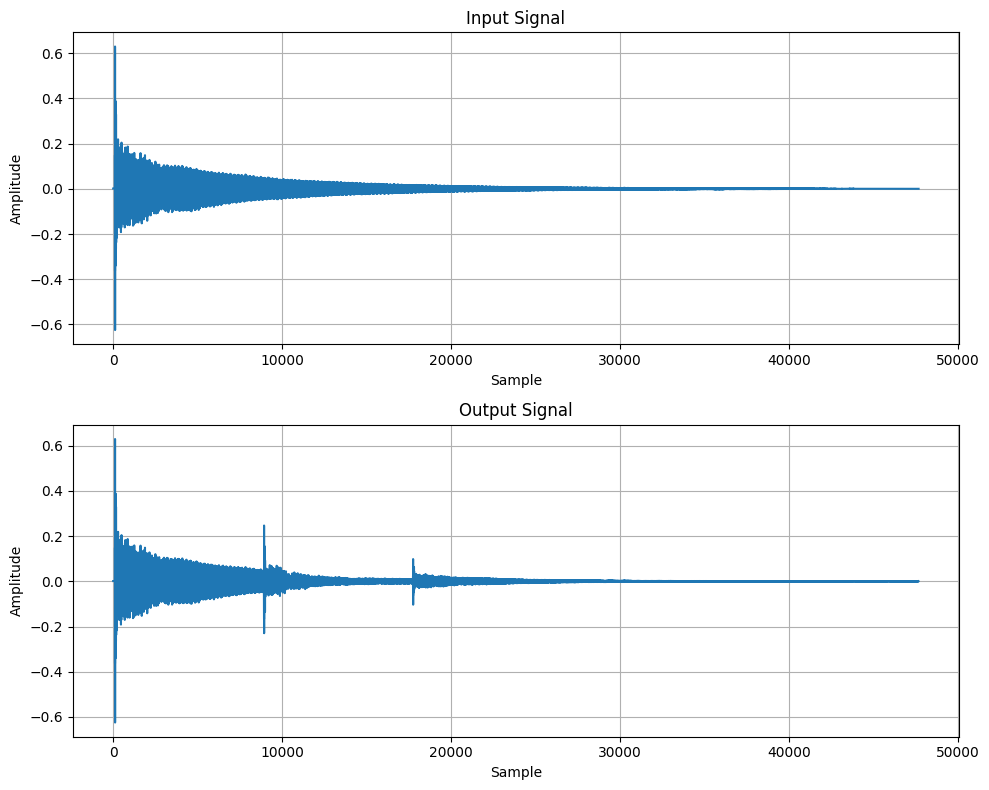

In [4]:
y = sistema(audio)
sd.play(y, samplerate=fs)

# Wait until the audio finishes playing
sd.wait()

plt.figure(figsize=(10, 8))

# Plot input signal
plt.subplot(2, 1, 1)
plt.plot(audio)
plt.title('Input Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid()

# Plot output signal
plt.subplot(2, 1, 2)
plt.plot(y)
plt.title('Output Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid()

plt.tight_layout()
plt.show()

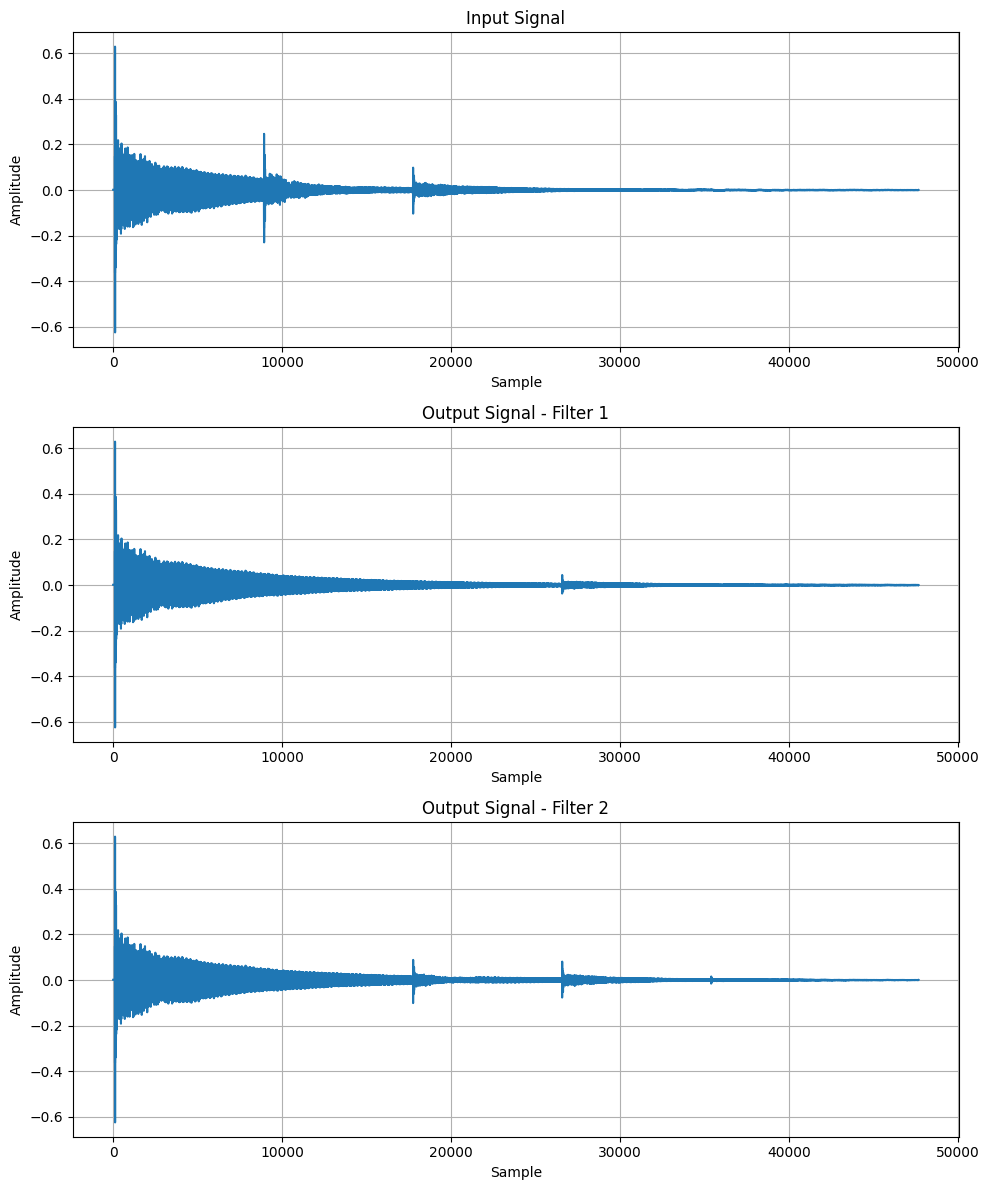

In [9]:
# Filter the input signal with filter1 and filter2
y_filter1 = filtro1(y)
y_filter2 = filtro2(y)

# Play the filtered signals
sd.play(y_filter1, samplerate=fs)
sd.wait()

sd.play(y_filter2, samplerate=fs)
sd.wait()

# Plot the filtered signals
plt.figure(figsize=(10, 12))

# Plot input signal
plt.subplot(3, 1, 1)
plt.plot(y)
plt.title('Input Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid()

# Plot output signal of filter1
plt.subplot(3, 1, 2)
plt.plot(y_filter1)
plt.title('Output Signal - Filter 1')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid()

# Plot output signal of filter2
plt.subplot(3, 1, 3)
plt.plot(y_filter2)
plt.title('Output Signal - Filter 2')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid()

plt.tight_layout()
plt.show()
